In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [2]:
df = pd.read_csv(r"D:\Downloads\listings.csv~\listings.csv")

## Display first 5 rows (transposed for better visibility)

In [3]:
df.head().T

0  \
id                                                                         2992450   
listing_url                                   https://www.airbnb.com/rooms/2992450   
scrape_id                                                           20250502031400   
last_scraped                                                            2025-05-02   
source                                                                 city scrape   
...                                                                            ...   
calculated_host_listings_count                                                   1   
calculated_host_listings_count_entire_homes                                      1   
calculated_host_listings_count_private_rooms                                     0   
calculated_host_listings_count_shared_rooms                                      0   
reviews_per_month                                                             0.07   

                                                                                 1  \
id                                                                         3820211   
listing_url                                   https://www.airbnb.com/rooms/3820211   
scrape_id                                                           20250502031400   
last_scraped                                                            2025-05-02   
source                                                                 city scrape   
...                                                                            ...   
calculated_host_listings_count                                                   4   
calculated_host_listings_count_entire_homes                                      4   
calculated_host_listings_count_private_rooms                                     0   
calculated_host_listings_count_shared_rooms                                      0   
reviews_per_month                                                             2.36   

                                                                                 2  \
id                                                                         5651579   
listing_url                                   https://www.airbnb.com/rooms/5651579   
scrape_id                                                           20250502031400   
last_scraped                                                            2025-05-02   
source                                                                 city scrape   
...                                                                            ...   
calculated_host_listings_count                                                   2   
calculated_host_listings_count_entire_homes                                      1   
calculated_host_listings_count_private_rooms                                     1   
calculated_host_listings_count_shared_rooms                                      0   
reviews_per_month                                                             3.05   

                                                                                 3  \
id                                                                         6623339   
listing_url                                   https://www.airbnb.com/rooms/6623339   
scrape_id                                                           20250502031400   
last_scraped                                                            2025-05-02   
source                                                                 city scrape   
...                                                                            ...   
calculated_host_listings_count                                                   4   
calculated_host_listings_count_entire_homes                                      4   
calculated_host_listings_count_private_rooms                                     0   
calculated_host_listings_count_shared_rooms                                      0   
reviews_per_month                   

In [4]:
df.shape

(449, 79)

##  Basic info about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            449 non-null    int64  
 1   listing_url                                   449 non-null    object 
 2   scrape_id                                     449 non-null    int64  
 3   last_scraped                                  449 non-null    object 
 4   source                                        449 non-null    object 
 5   name                                          449 non-null    object 
 6   description                                   439 non-null    object 
 7   neighborhood_overview                         203 non-null    object 
 8   picture_url                                   449 non-null    object 
 9   host_id                                       449 non-null    int

## Identifying Numerical and Categorical Columns¶


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


d_type = df.dtypes
n_unique = df.nunique()
ratio_null = df.isnull().sum() / df.shape[0]

pd.DataFrame({'D_Type' : d_type  , "N_Unique" : n_unique , "Ratio_Null" : ratio_null} )

D_Type  N_Unique  Ratio_Null
id                                              int64       449    0.000000
listing_url                                    object       449    0.000000
scrape_id                                       int64         1    0.000000
last_scraped                                   object         1    0.000000
source                                         object         2    0.000000
name                                           object       448    0.000000
description                                    object       399    0.022272
neighborhood_overview                          object       162    0.547884
picture_url                                    object       442    0.000000
host_id                                         int64       193    0.000000
host_url                                       object       193    0.000000
host_name                                      object       172    0.000000
host_since                                     object       191    0.000000
host_location                                  object        27    0.233853
host_about                                     object        94    0.463252
host_response_time                             object         4    0.062361
host_response_rate                             object        14    0.062361
host_acceptance_rate                           object        41    0.013363
host_is_superhost                              object         2    0.011136
host_thumbnail_url                             object       180    0.000000
host_picture_url                               object       180    0.000000
host_neighbourhood                             object        40    0.155902
host_listings_count                             int64        19    0.000000
host_total_listings_count                       int64        22    0.000000
host_verifications                             object         3    0.000000
host_has_profile_pic                           object         2    0.000000
host_identity_verified                         object         2    0.000000
neighbourhood                                  object         1    0.547884
neighbourhood_cleansed                         object        15    0.000000
neighbourhood_group_cleansed                  float64         0    1.000000
latitude                                      float64       422    0.000000
longitude                                     float64       434    0.000000
property_type                                  object        21    0.000000
room_type                                      object         2    0.000000
accommodates                                    int64        15    0.000000
bathrooms                                     float64        11    0.080178
bathrooms_text                                 object        19    0.000000
bedrooms                                      float64         9    0.008909
beds                                          float64         9    0.080178
amenities                                      object       442    0.000000
price                                          object       152    0.080178
minimum_nights                                  int64        19    0.000000
maximum_nights                                  int64        34    0.000000
minimum_minimum_nights                          int64        18    0.000000
maximum_minimum_nights                          int64        20    0.000000
minimum_maximum_nights                          int64        29    0.000000
maximum_maximum_nights                          int64        28    0.000000
minimum_nights_avg_ntm                        float64        39    0.000000
maximum_nights_avg_ntm                        float64        43    0.000000
calendar_updated                              float64         0    1.000000
has_availability                               object         1    0.015590
availability_30                                 int64        31    0.000000
availability_60    

In [7]:
df['property_type'].value_counts()

Entire rental unit                   214
Entire home                           74
Private room in home                  72
Private room in rental unit           28
Room in hotel                         12
Entire townhouse                      11
Entire condo                           7
Private room in bed and breakfast      5
Entire loft                            4
Private room in guest suite            4
Entire vacation home                   4
Entire guest suite                     3
Entire place                           2
Private room in townhouse              2
Entire guesthouse                      1
Private room in villa                  1
Private room in guesthouse             1
Room in aparthotel                     1
Entire cottage                         1
Entire serviced apartment              1
Private room in condo                  1
Name: property_type, dtype: int64

In [8]:
df = df.drop(columns = ['neighbourhood_group_cleansed' , 'calendar_updated' , 'license' , 'neighborhood_overview' , 'neighbourhood' , 'host_about'])

In [9]:
df.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
name                                              0
description                                      10
picture_url                                       0
host_id                                           0
host_url                                          0
host_name                                         0
host_since                                        0
host_location                                   105
host_response_time                               28
host_response_rate                               28
host_acceptance_rate                              6
host_is_superhost                                 5
host_thumbnail_url                                0
host_picture_url                                  0
host_neighbo

In [10]:
df.duplicated().sum()

0

In [11]:
df['host_location'].value_counts()

Albany, NY                 245
New York, NY                28
United States               12
Colonie, NY                  6
Latham, NY                   6
Voorheesville, NY            6
Jackson Township, NJ         5
Saratoga Springs, NY         5
Murrieta, CA                 5
Gloversville, NY             3
Glenville, NY                3
Tampa, FL                    2
New Hartford, NY             2
San Juan, Puerto Rico        2
Providence, RI               2
Washington, DC               1
Loudonville, NY              1
New York, United States      1
Northampton, PA              1
Schenectady, NY              1
Fort Walton Beach, FL        1
Valley Stream, NY            1
Glenmont, NY                 1
Woodbury, NY                 1
Delmar, NY                   1
Stamford, NY                 1
Fayetteville, NC             1
Name: host_location, dtype: int64

## handel missing values and replace not mining text 

In [12]:
df['description'] = df['description'].fillna('No description')


In [13]:
df['host_location'] = df['host_location'].replace({
    'New York, United States': 'new york, ny',
    'United States': 'unknown',
})


In [14]:
threshold = 3 
value_counts = df['host_location'].value_counts()
mask = value_counts[value_counts <= threshold  ].index
df['host_location'] = df['host_location'].replace(mask , 'Others')

In [15]:
df['host_location'].value_counts()

Albany, NY              245
New York, NY             28
Others                   26
unknown                  12
Latham, NY                6
Voorheesville, NY         6
Colonie, NY               6
Saratoga Springs, NY      5
Murrieta, CA              5
Jackson Township, NJ      5
Name: host_location, dtype: int64

In [16]:
df['host_location'].isnull().sum()

105

In [17]:
df['host_location'] = df['host_location'].fillna('Others')

In [18]:
df['host_response_time'].value_counts()

within an hour        308
within a few hours     60
within a day           47
a few days or more      6
Name: host_response_time, dtype: int64

In [19]:
most_common = df['host_response_time'].mode()[0]
df['host_response_time'] = df['host_response_time'].fillna(most_common)

In [20]:
df['host_acceptance_rate'].value_counts()

100%    91
99%     70
97%     61
98%     47
93%     16
78%     16
50%     14
90%     12
0%      11
89%     10
13%      8
95%      7
60%      7
96%      6
88%      6
91%      5
77%      5
67%      5
23%      5
55%      4
81%      4
80%      4
86%      3
66%      2
85%      2
79%      2
74%      2
58%      2
84%      2
94%      2
75%      2
71%      1
40%      1
42%      1
73%      1
83%      1
92%      1
70%      1
47%      1
33%      1
36%      1
Name: host_acceptance_rate, dtype: int64

In [21]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%' , '').astype(float) / 100

In [22]:
most_common = df['host_acceptance_rate'].mode()[0]
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(most_common)

In [23]:
df['host_response_rate'].value_counts()

100%    354
97%      26
90%      19
80%       6
0%        5
67%       3
92%       1
98%       1
83%       1
91%       1
94%       1
50%       1
99%       1
38%       1
Name: host_response_rate, dtype: int64

In [24]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%' , '').astype(float) / 100
most_common = df['host_response_rate'].mode()[0]
df['host_response_rate'] = df['host_response_rate'].fillna(most_common)

In [25]:
print(df['host_is_superhost'].value_counts())
df['host_is_superhost'] = df['host_is_superhost'].fillna(method = 'ffill')

t    245
f    199
Name: host_is_superhost, dtype: int64


In [26]:
df['host_neighbourhood'].value_counts()

Pine Hills                                    101
Mansion Area                                   42
Delaware Avenue                                30
Center Square & Hudson/Park                    27
Park South                                     20
Melrose                                        18
Washington Park                                14
Pastures                                       13
Central Avenue                                 12
Capitol Hill                                   11
Downtown                                        9
New Scotland                                    8
Arbor Hill                                      7
Highland Lakes                                  6
Southeast Raleigh                               6
West Hill                                       6
Ten Broeck Triangle                             6
Northwest Philadelphia                          5
Manning Boulevard                               4
Buckingham Lake                                 4


In [27]:
threshold = 3 
value_counts = df['host_neighbourhood'].value_counts()
mask = value_counts[value_counts <= threshold  ].index
df['host_neighbourhood'] = df['host_neighbourhood'].replace(mask , 'Others')

In [28]:
df['host_neighbourhood'] = df['host_neighbourhood'].fillna(method = 'ffill')

In [29]:
df['host_listings_count'].value_counts()

1       98
2       59
3       44
9       36
4       22
24      22
19      18
6       18
17      18
15      18
5       17
7       15
8       14
14      14
12      12
10      11
1214     6
594      5
11       2
Name: host_listings_count, dtype: int64

In [30]:
lis = ['beds' , 'bedrooms' , 'bathrooms' , 'has_availability' , 'review_scores_value' , 'review_scores_location' , 'review_scores_communication' 
       , 'review_scores_checkin' ,  'review_scores_cleanliness' , 'review_scores_accuracy' , 'review_scores_rating'  , 'host_neighbourhood']
for col in lis :
    mode_fill = df[col].mode()[0]
    df[col] = df[col].fillna(mode_fill)

In [31]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\magdy mohamed\AppData\Local\Temp\ipykernel_25512\2337335738.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [32]:
mean_price = df['price'].mean()
df['price'] = df['price'].fillna(mean_price)

## handel date time Columns 

In [33]:
lis = ['first_review' , 'last_review']
for col in lis :
    mode_fill = df[col].mode()[0]
    df[col] = df[col].fillna(mode_fill)

In [34]:
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [35]:
df['first_review_year'] = df['first_review'].dt.year
df['first_review_month'] = df['first_review'].dt.month
df['first_review_day'] = df['first_review'].dt.day

df['last_review_year'] = df['last_review'].dt.year
df['last_review_month'] = df['last_review'].dt.month
df['last_review_day'] = df['last_review'].dt.day

In [36]:
df['estimated_revenue_l365d'] = df['estimated_revenue_l365d'].fillna(method = 'ffill')

In [37]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(method = 'ffill')

In [38]:
df.isna().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0
host_picture_url                                0
host_neighbourhood                              0


##  Statistical summary

In [39]:
df.describe()

id     scrape_id       host_id  host_response_rate  host_acceptance_rate  host_listings_count  host_total_listings_count    latitude   longitude  accommodates   bathrooms    bedrooms        beds        price  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  availability_eoy  number_of_reviews_ly  estimated_occupancy_l365d  estimated_revenue_l365d  review_scores_rating  review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  review_scores_communication  review_scores_location  review_scores_value  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  reviews_per_month  \
count  4.490000e+02  4.490000e+02  4.490000e+02          449.000000            449.000000           449.000000                 449.000000  449.000000  449.000000    449.000000  449.000000  449.000000  449.000000   449.000000      449.000000      449.000000              449.000000              449.000000              449.000000              449.000000               449.00000              449.000000       449.000000       449.000000       449.000000        449.000000         449.000000             449.000000              449.000000        449.000000            449.000000                 449.000000               449.000000            449.000000              449.000000                 449.000000             449.000000                   449.000000              449.000000           449.000000                      449.000000                                   449.000000                                    449.000000                                        449.0         449.000000   
mean   7.393773e+17  2.025050e+13  2.440445e+08            0.974566              0.870401            29.714922                  49.378619   42.658424  -73.777316      3.503341    1.209354    1.634744    1.706013   114.135593        6.799555      522.236080                6.336303                6.828508              647.360802              685.057906                 6.63363              665.633185        15.037862        33.449889        51.750557        217.006682          57.207127              14.630290                0.755011        153.438753             14.790646                  83.514477              9207.975501              4.791604                4.834143                   4.811247               4.862895                     4.878085                4.725813             4.763207                        6.224944                                     4.371938                                      1.853007                                          0.0           1.928062   
std    5.120687e+17  0.000000e+00  1.990504e+08            0.117370              0.229338           151.270199                 295.809693    0.010326    0.019102      2.524100    0.598213    1.172697    1.220357   104.833801       19.708816      394.163306               19.392804               19.437043              423.561256              420.994381                19.45107              417.592846        10.964671        21.416007        30.277661        118.504285         106.198661              20.688087                1.500782         77.457139             21.837586                  86.713379             11753.790109              0.384868                0.319561                   0.301004               0.332728                     0.307330                0.356407             0.409016                        6.139066                                     5.691646                                      3.582665                                          0.0           1.967386   
min    2.992450e+06  2.025050e+13  6.576000e+04            0.0000

## Identifying Numerical and Categorical Columns¶

In [40]:
numaric_column = df.select_dtypes(include = 'number').columns
categorical_column = df.select_dtypes(include = 'object').columns
print(numaric_column)
print("-------------------------------------")
print(categorical_column)

Index(['id', 'scrape_id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
       'calculated_host_list

# Visualizations

## what is the distribution of Listing Price ? 

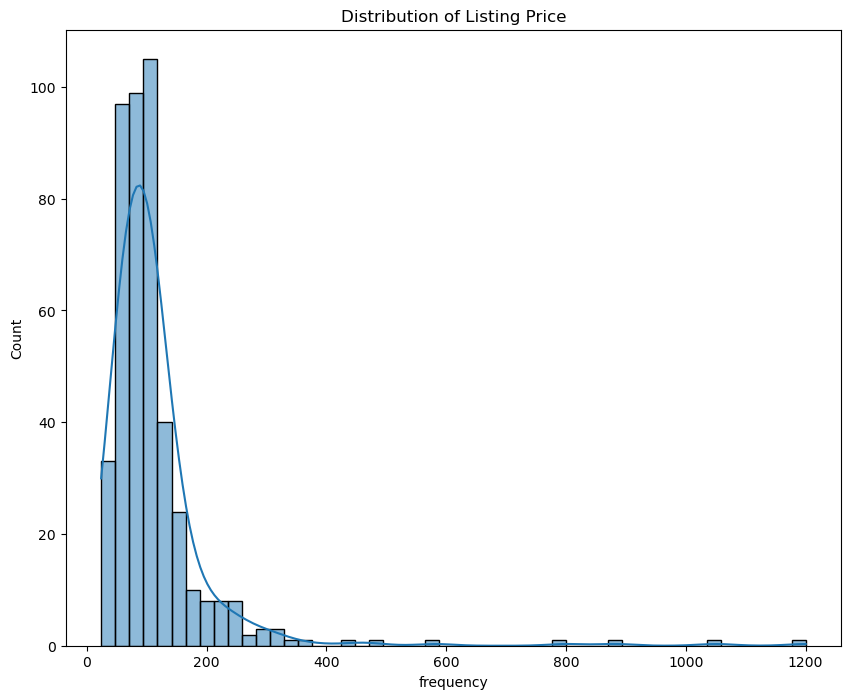

In [41]:
plt.figure(figsize = (10 , 8))
sns.histplot(df['price'] , bins = 50 , kde = True )
plt.title("Distribution of Listing Price")
plt.xlabel("Price $")
plt.xlabel("frequency")
plt.show()

## Who is the top 5  hosts ? 

C:\Users\magdy mohamed\AppData\Local\Temp\ipykernel_25512\2554697533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top5, x='host_name', order=top_name, palette='pastel')


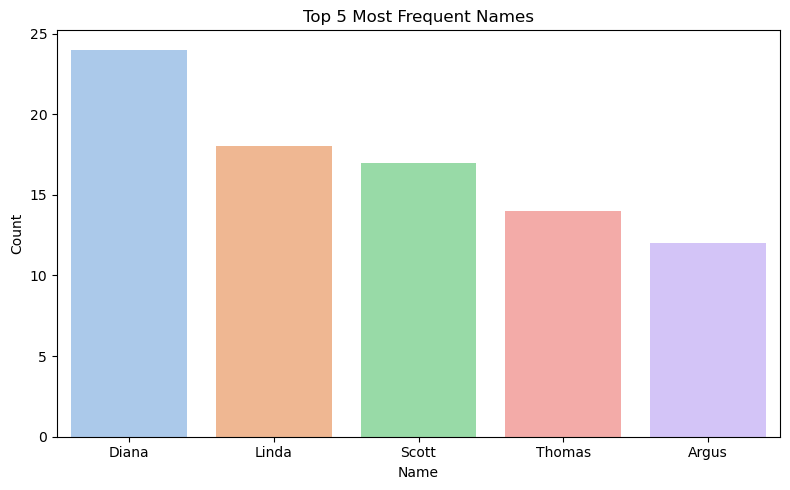

In [42]:
top_name = df['host_name'].value_counts().head(5).index
df_top5 = df[df['host_name'].isin(top_name)]

plt.figure(figsize=(8, 5))
sns.countplot(data=df_top5, x='host_name', order=top_name, palette='pastel')
plt.title('Top 5 Most Frequent Names')
plt.xlabel('Name')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

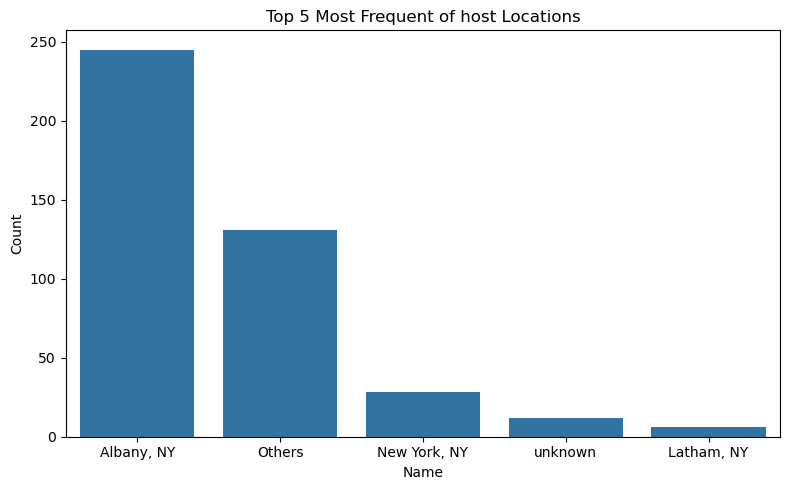

In [43]:
top_name = df['host_location'].value_counts().head(5).index
df_top5 = df[df['host_location'].isin(top_name)]

plt.figure(figsize=(8, 5))
sns.countplot(data=df_top5, x='host_location', order=top_name)
plt.title('Top 5 Most Frequent of host Locations')
plt.xlabel('Name')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Distribution Plots — Bedrooms, Bathrooms, Beds, Accommodates

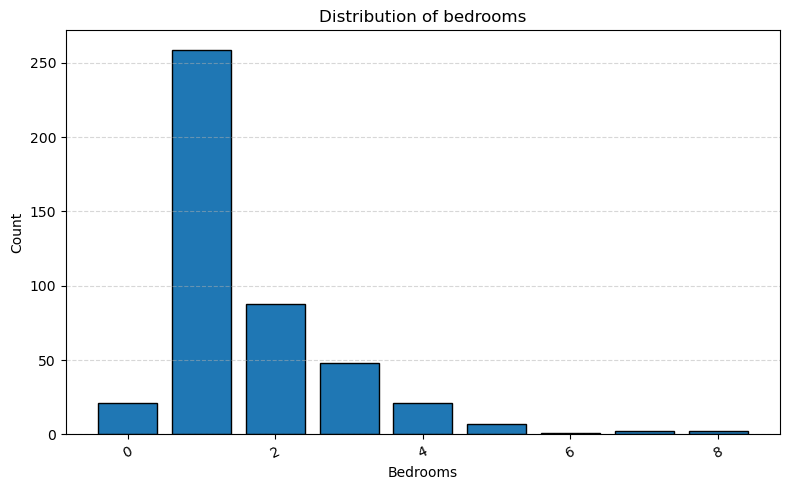

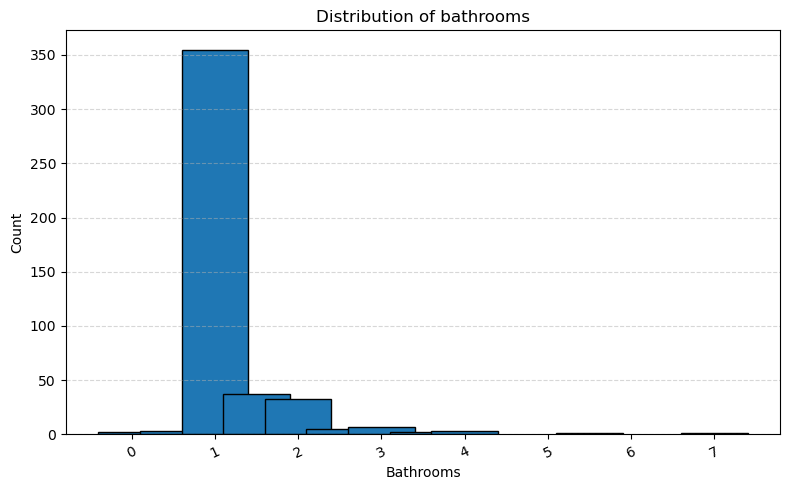

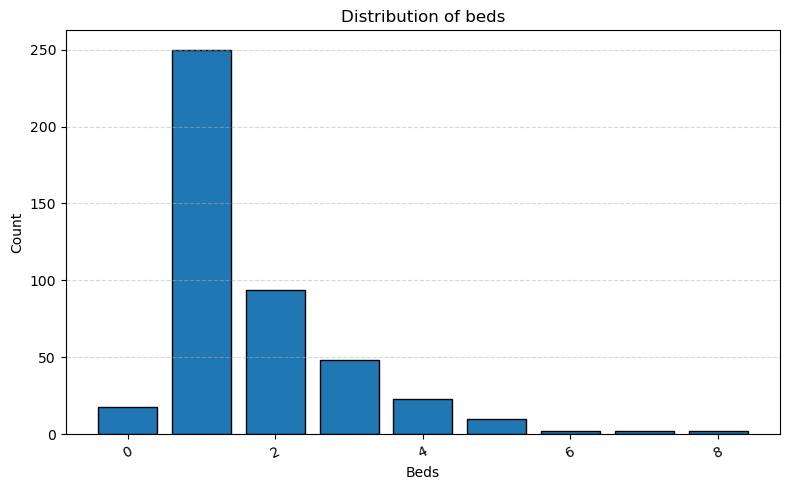

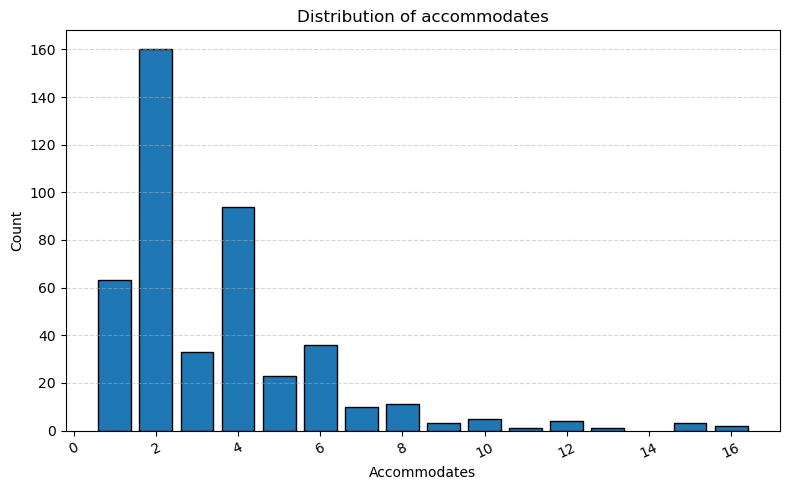

In [44]:
lis = ['bedrooms' , 'bathrooms' , 'beds' , 'accommodates']
for col in lis :
    counts = df[col].value_counts().sort_index()
    labels = counts.index
    values = counts.values
    plt.figure(figsize = (8,5))
    plt.bar(labels , values , edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=25)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    

## room_type Distribution

<Axes: ylabel='room_type'>

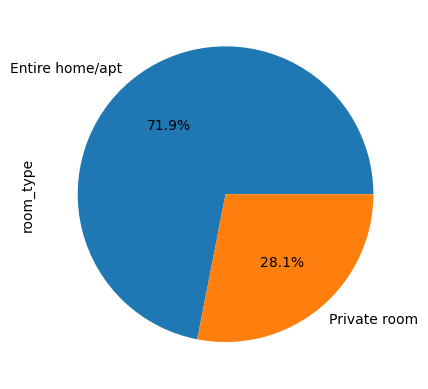

In [45]:
df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')


## host_is_superhost Distribution

<Axes: ylabel='host_is_superhost'>

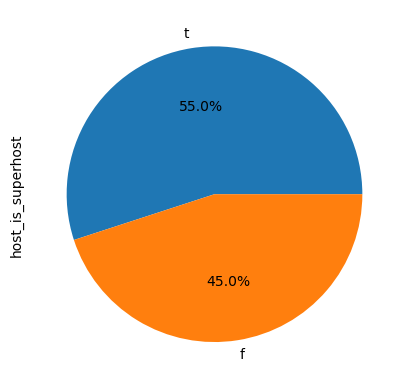

In [46]:
df['host_is_superhost'].value_counts().plot(kind='pie', autopct='%1.1f%%')

## Average Price by Room Type

<Axes: xlabel='room_type', ylabel='price'>

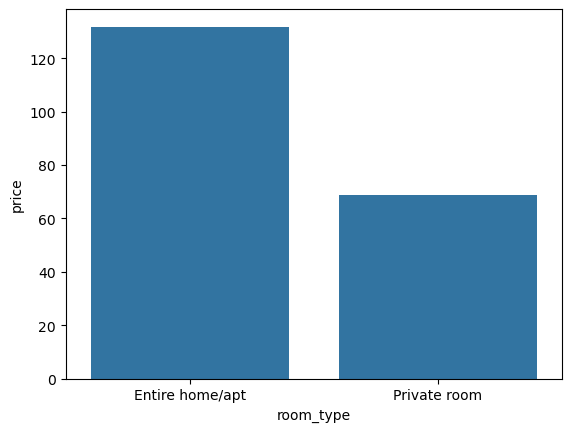

In [47]:
avg_price = df.groupby('room_type')['price'].mean().reset_index()
sns.barplot(x='room_type', y='price', data=avg_price)


## Total Estimated Revenue by Host

<Axes: xlabel='host_name'>

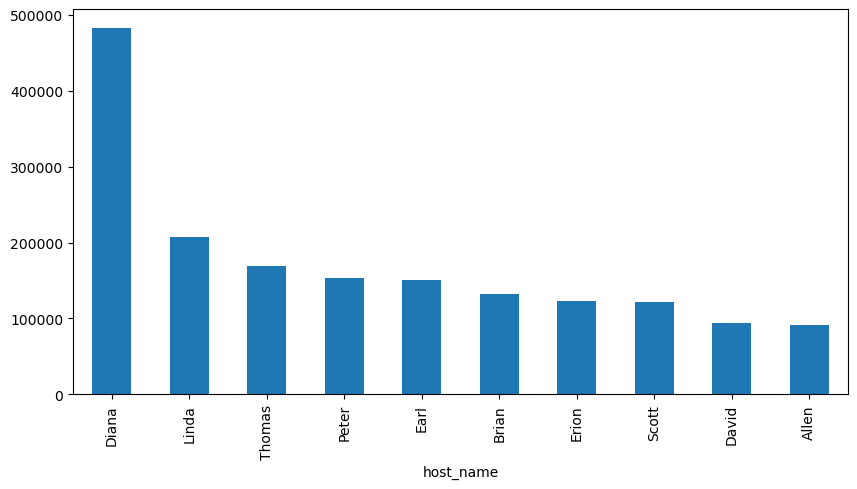

In [48]:
host_revenue = df.groupby('host_name')['estimated_revenue_l365d'].sum().sort_values(ascending=False).head(10)
host_revenue.plot(kind='bar', figsize=(10,5))


## Average Review Score by Property Type

<Axes: ylabel='property_type'>

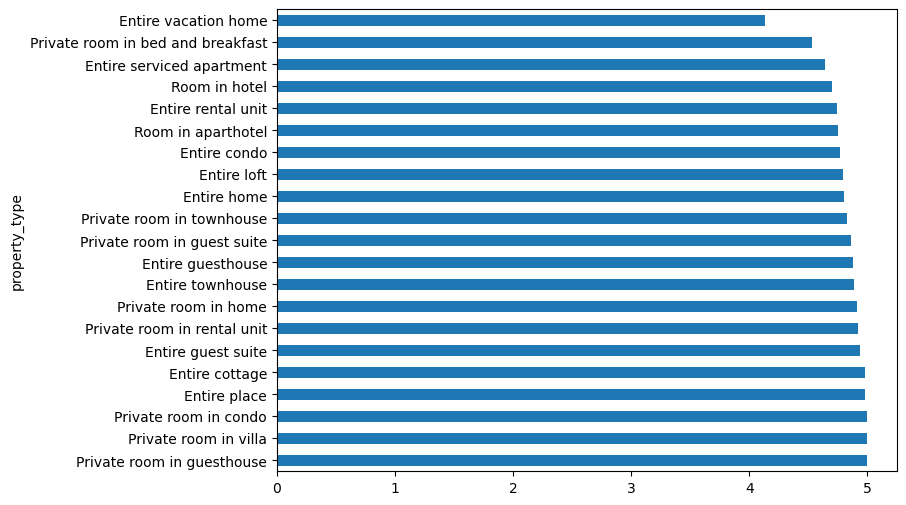

In [49]:
score_by_type = df.groupby('property_type')['review_scores_rating'].mean().sort_values(ascending=False)
score_by_type.plot(kind='barh', figsize=(8, 6))


## Number of Listings by Neighborhood cleansed 

<Axes: xlabel='neighbourhood_cleansed'>

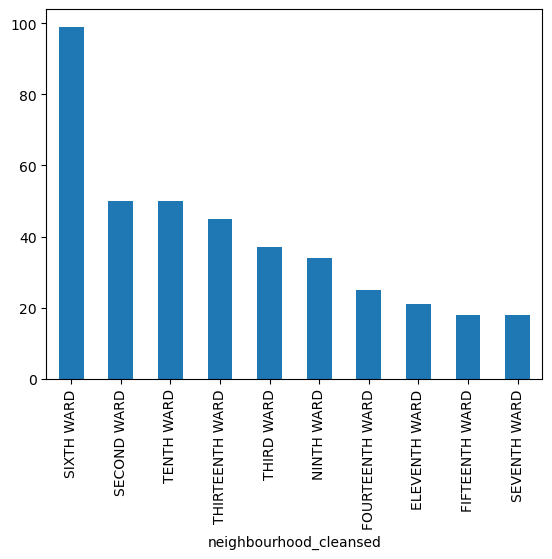

In [50]:
df.groupby('neighbourhood_cleansed')['id'].count().sort_values(ascending=False).head(10).plot(kind='bar')


##  Average & Median of Price and Rating

In [51]:
df.groupby('room_type')[['price', 'review_scores_rating']].agg(['mean', 'median'])


price        review_scores_rating       
                       mean median                 mean median
room_type                                                     
Entire home/apt  131.814609  104.0             4.757616   4.88
Private room      68.815577   54.5             4.878730   4.98

## Count by First Review Year

<Axes: xlabel='first_review_year'>

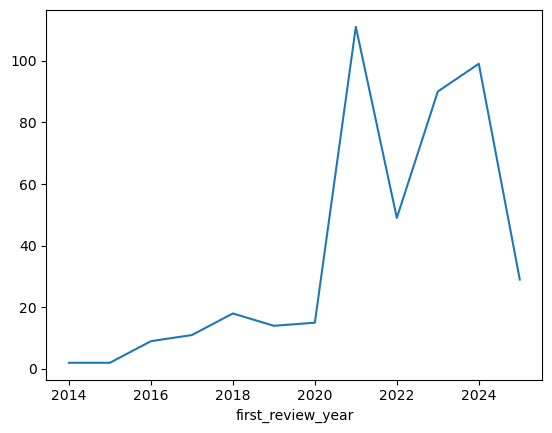

In [52]:
df.groupby('first_review_year')['id'].count().plot(kind='line')

##  Price vs. Days 

<Axes: title={'center': 'Average Price per Day'}, xlabel='Day', ylabel='Average Price'>

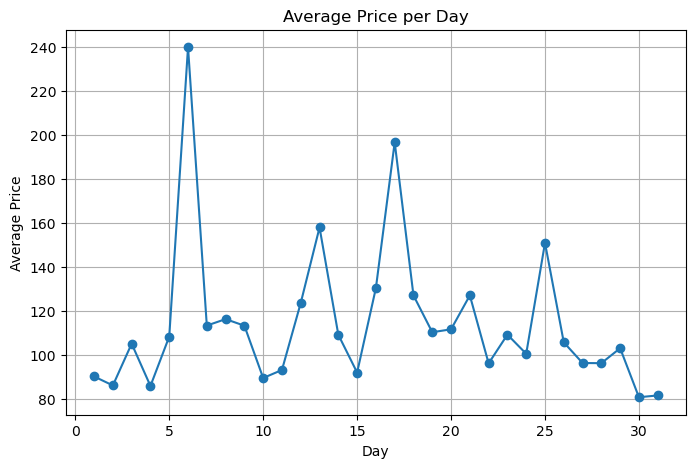

In [53]:
df.groupby('first_review_day')['price'].mean().plot(
    kind='line',
    marker='o',
    title='Average Price per Day',
    xlabel='Day',
    ylabel='Average Price',
    grid=True,
    figsize=(8, 5)
)


## Price vs. Month

<Axes: title={'center': 'Average Price per Month'}, xlabel='Month', ylabel='Average Price'>

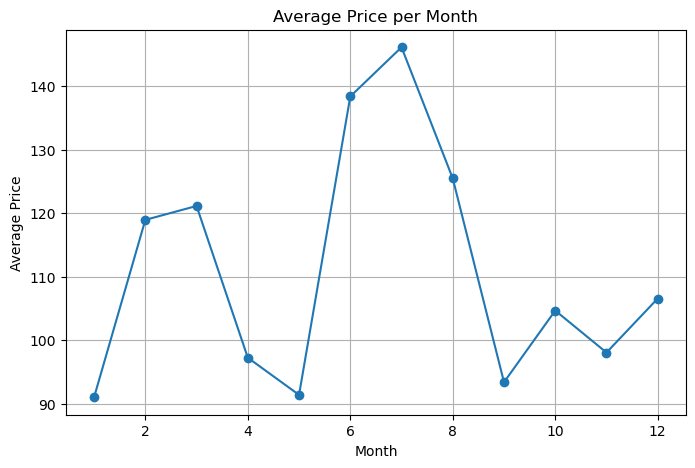

In [54]:
df.groupby('first_review_month')['price'].mean().plot(
    kind='line',
    marker='o',
    title='Average Price per Month',
    xlabel='Month',
    ylabel='Average Price',
    grid=True,
    figsize=(8, 5)
)

## Price vs. Years

<Axes: title={'center': 'Average Price per year'}, xlabel='year', ylabel='Average Price'>

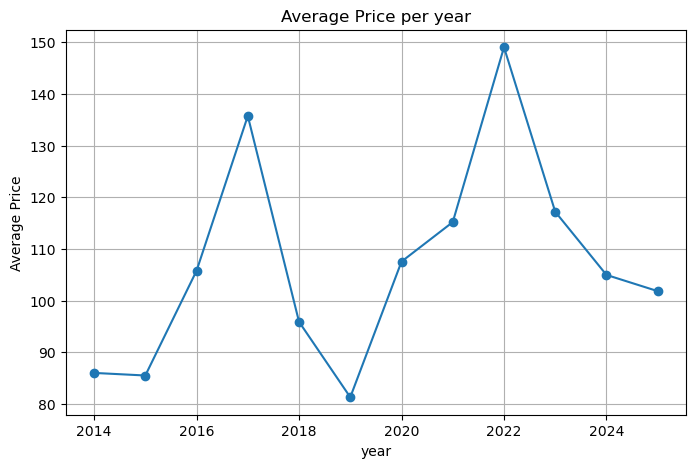

In [55]:
df.groupby('first_review_year')['price'].mean().plot(
    kind='line',
    marker='o',
    title='Average Price per year',
    xlabel='year',
    ylabel='Average Price',
    grid=True,
    figsize=(8, 5)
)

## Airbnb Listings Map — Price & Occupancy

In [56]:
fig = px.scatter_mapbox(df,
                        lat='latitude',
                        lon='longitude',
                        color='price',
                        size='estimated_occupancy_l365d',
                        hover_name='name',
                        mapbox_style='carto-positron',
                        zoom=10)
fig.show()


## Outlier Detection and Treatment 

<Axes: >

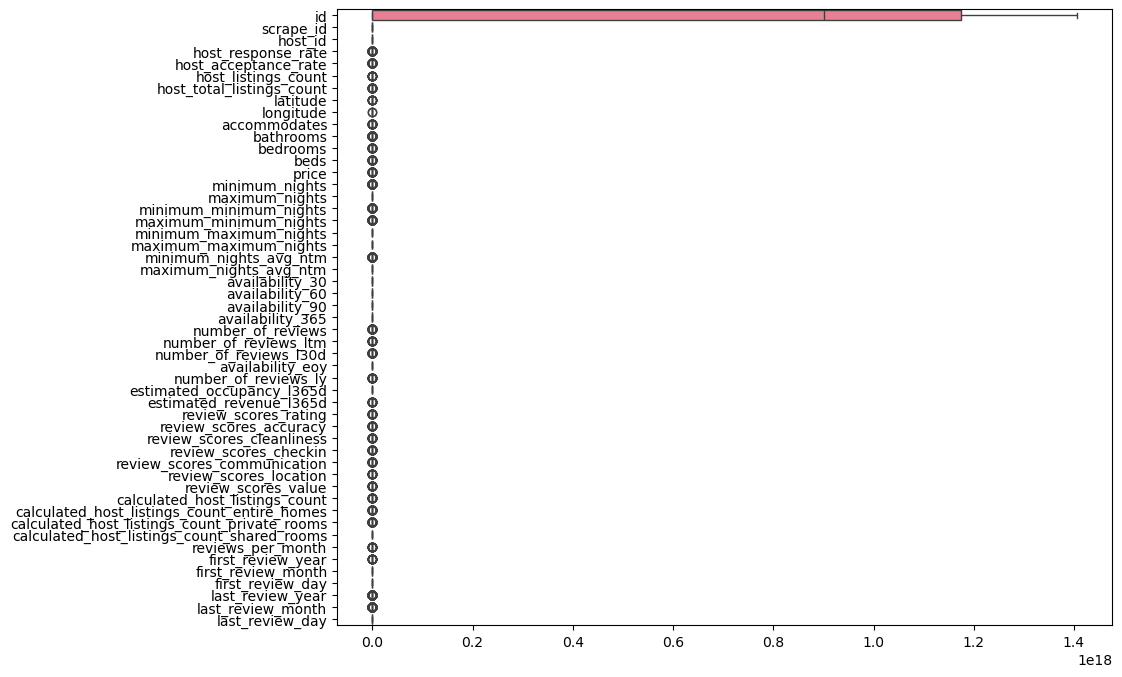

In [57]:
plt.figure(figsize =(10,8))
sns.boxplot(df[numaric_column] , orient = 'h')

## Review Scores vs. Estimated Revenue

<Axes: xlabel='review_scores_rating', ylabel='estimated_revenue_l365d'>

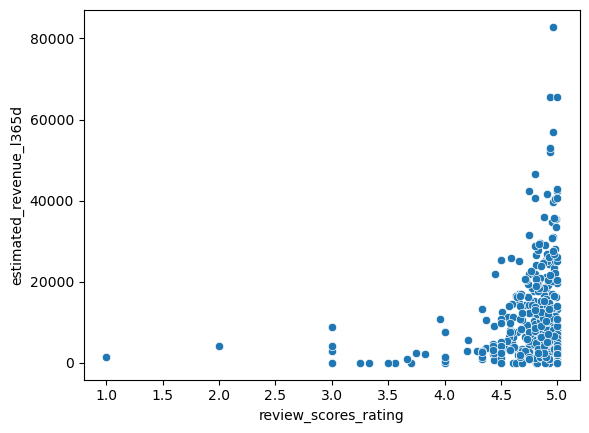

In [58]:
sns.scatterplot(x='review_scores_rating', y='estimated_revenue_l365d', data=df)


##  Checking Multicollinearity Using a Correlation Matrix

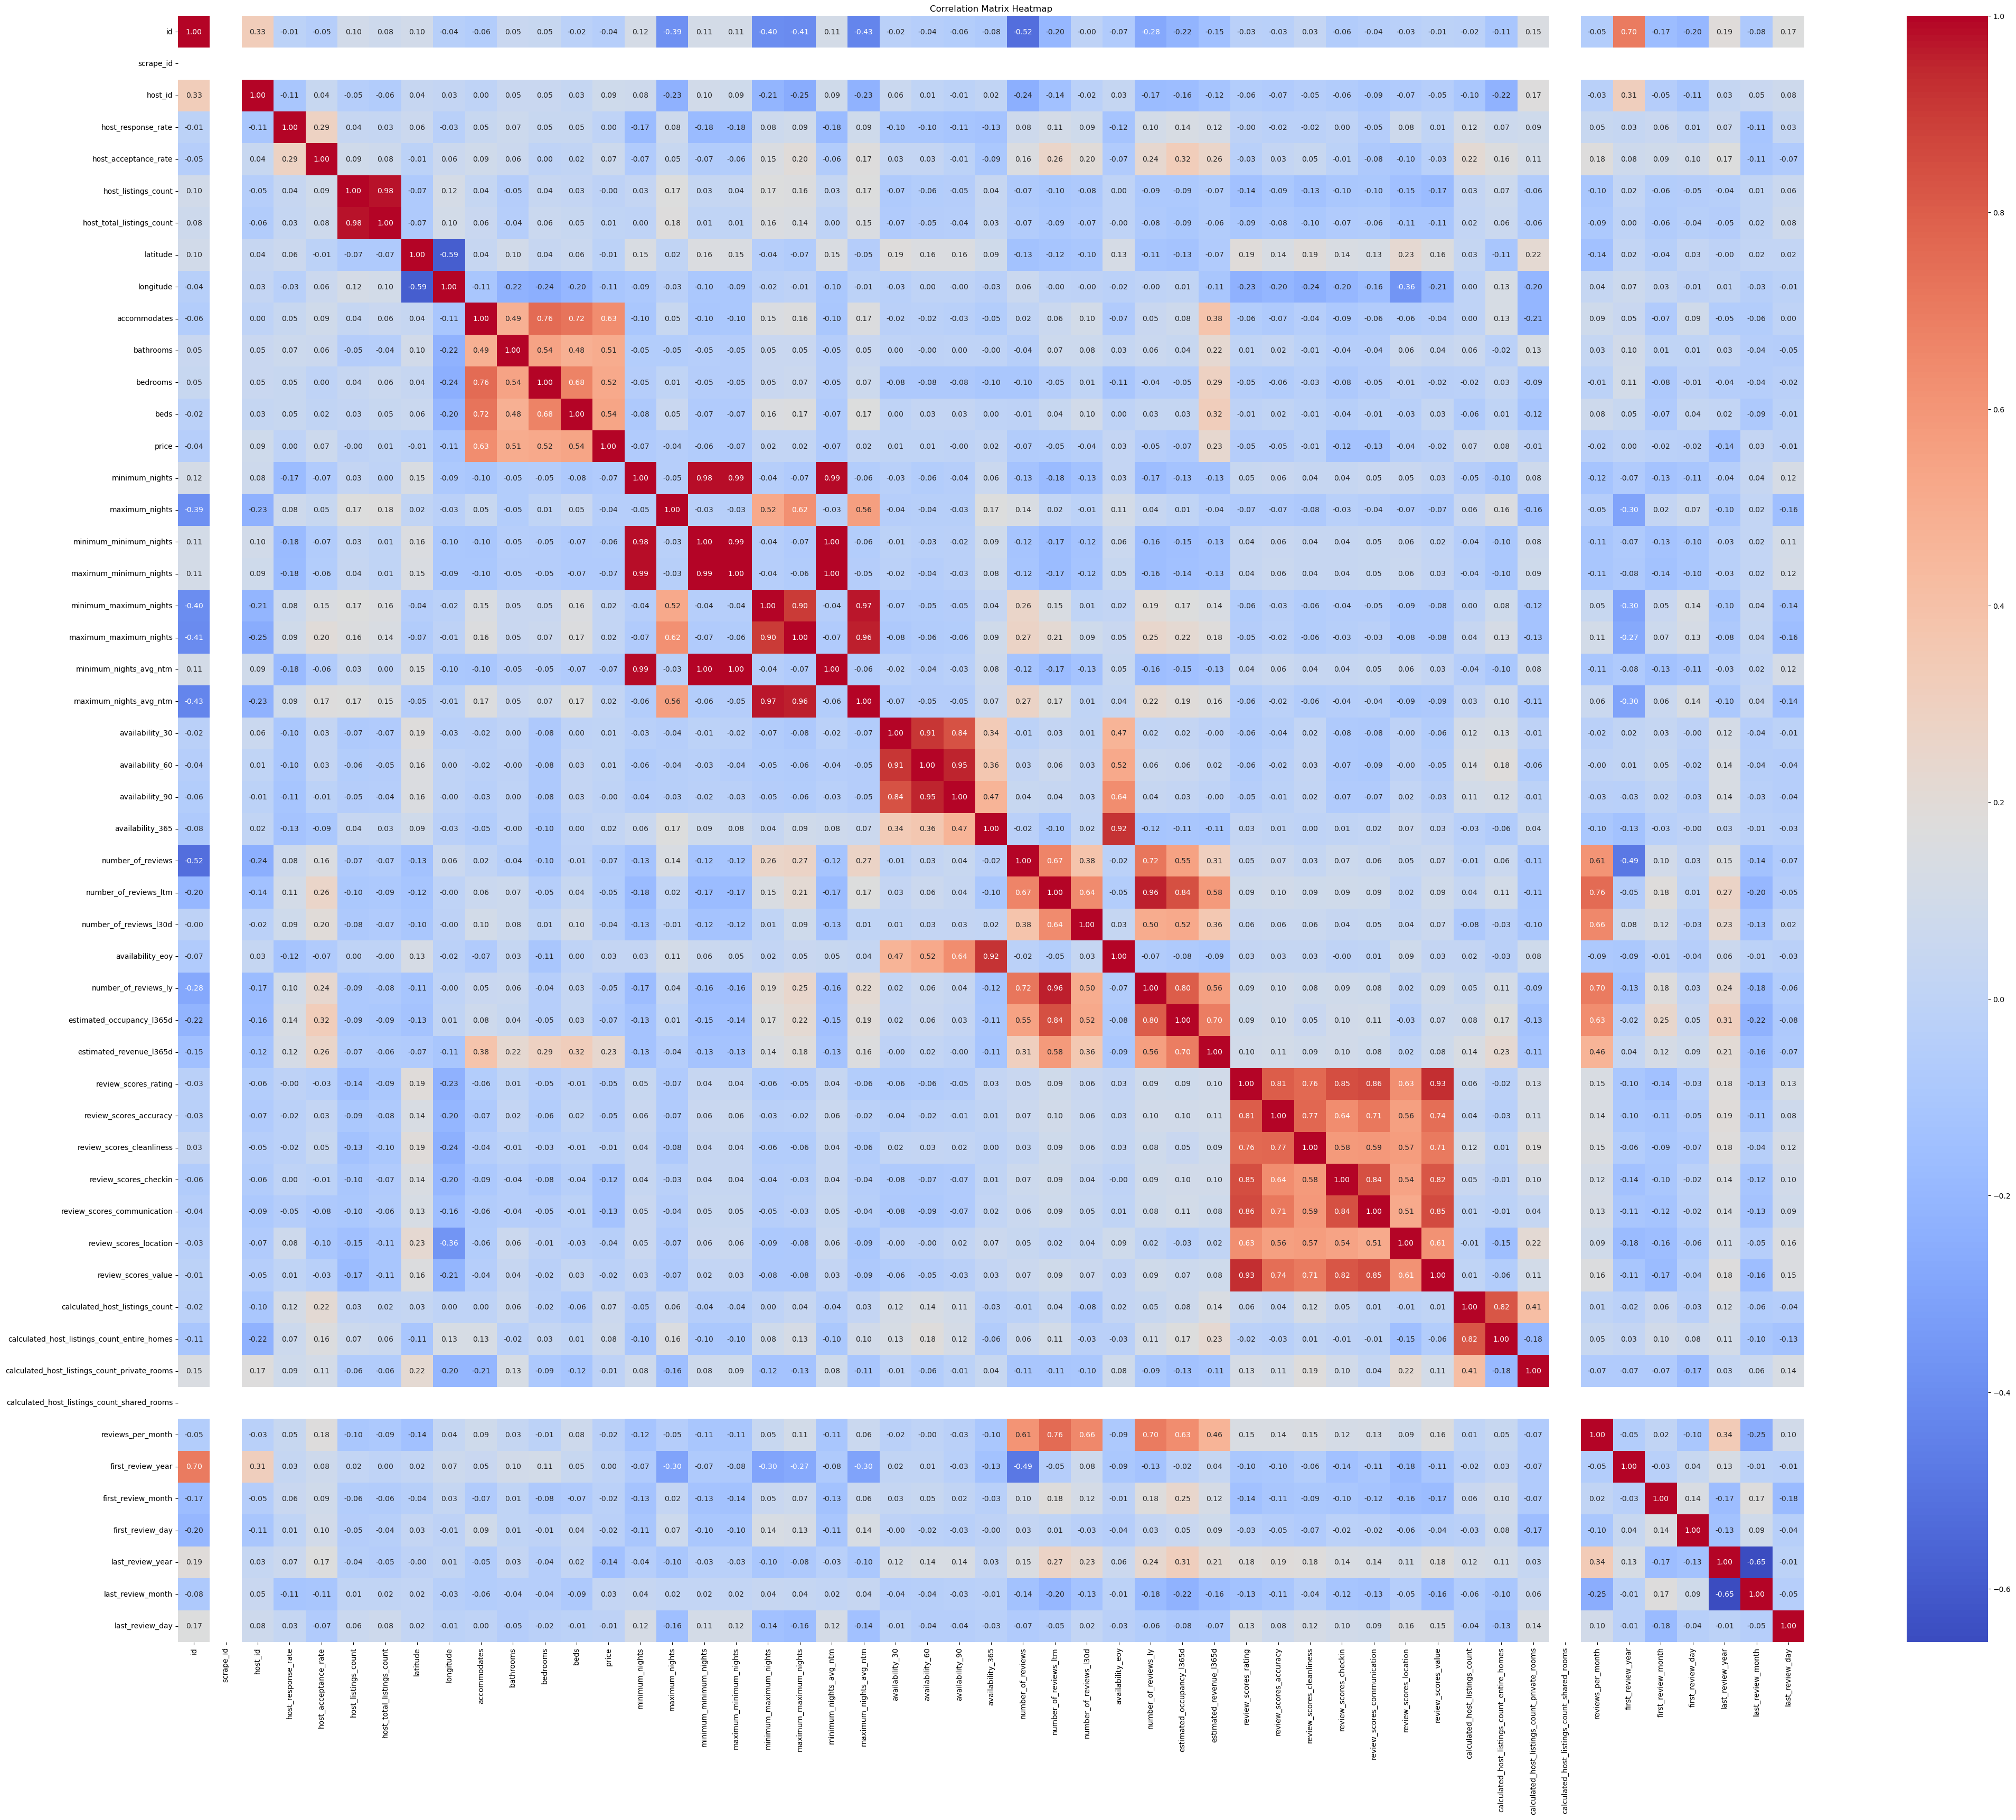

In [59]:
plt.figure(figsize=(50 , 40 ))
sns.heatmap(df[numaric_column].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Dropping Highly Correlated Features¶

In [60]:
df = df.drop(columns=['id' , 'scrape_id' , 'number_of_reviews_ltm' , 'calculated_host_listings_count_shared_rooms' , 'host_total_listings_count' , 'minimum_nights'
          , 'minimum_nights_avg_ntm' , 'minimum_maximum_nights' , 'availability_30' , 'availability_60' , 'availability_90' , 'availability_365' , 'number_of_reviews_ltm' ,
          'number_of_reviews_ly' , 'review_scores_rating' , 'review_scores_checkin' ,'review_scores_communication' , 'calculated_host_listings_count_entire_homes'  , 'maximum_minimum_nights' , 'maximum_maximum_nights'  ] 
 )

## Updated Correlation Matrix After Dropping Highly Correlated Features

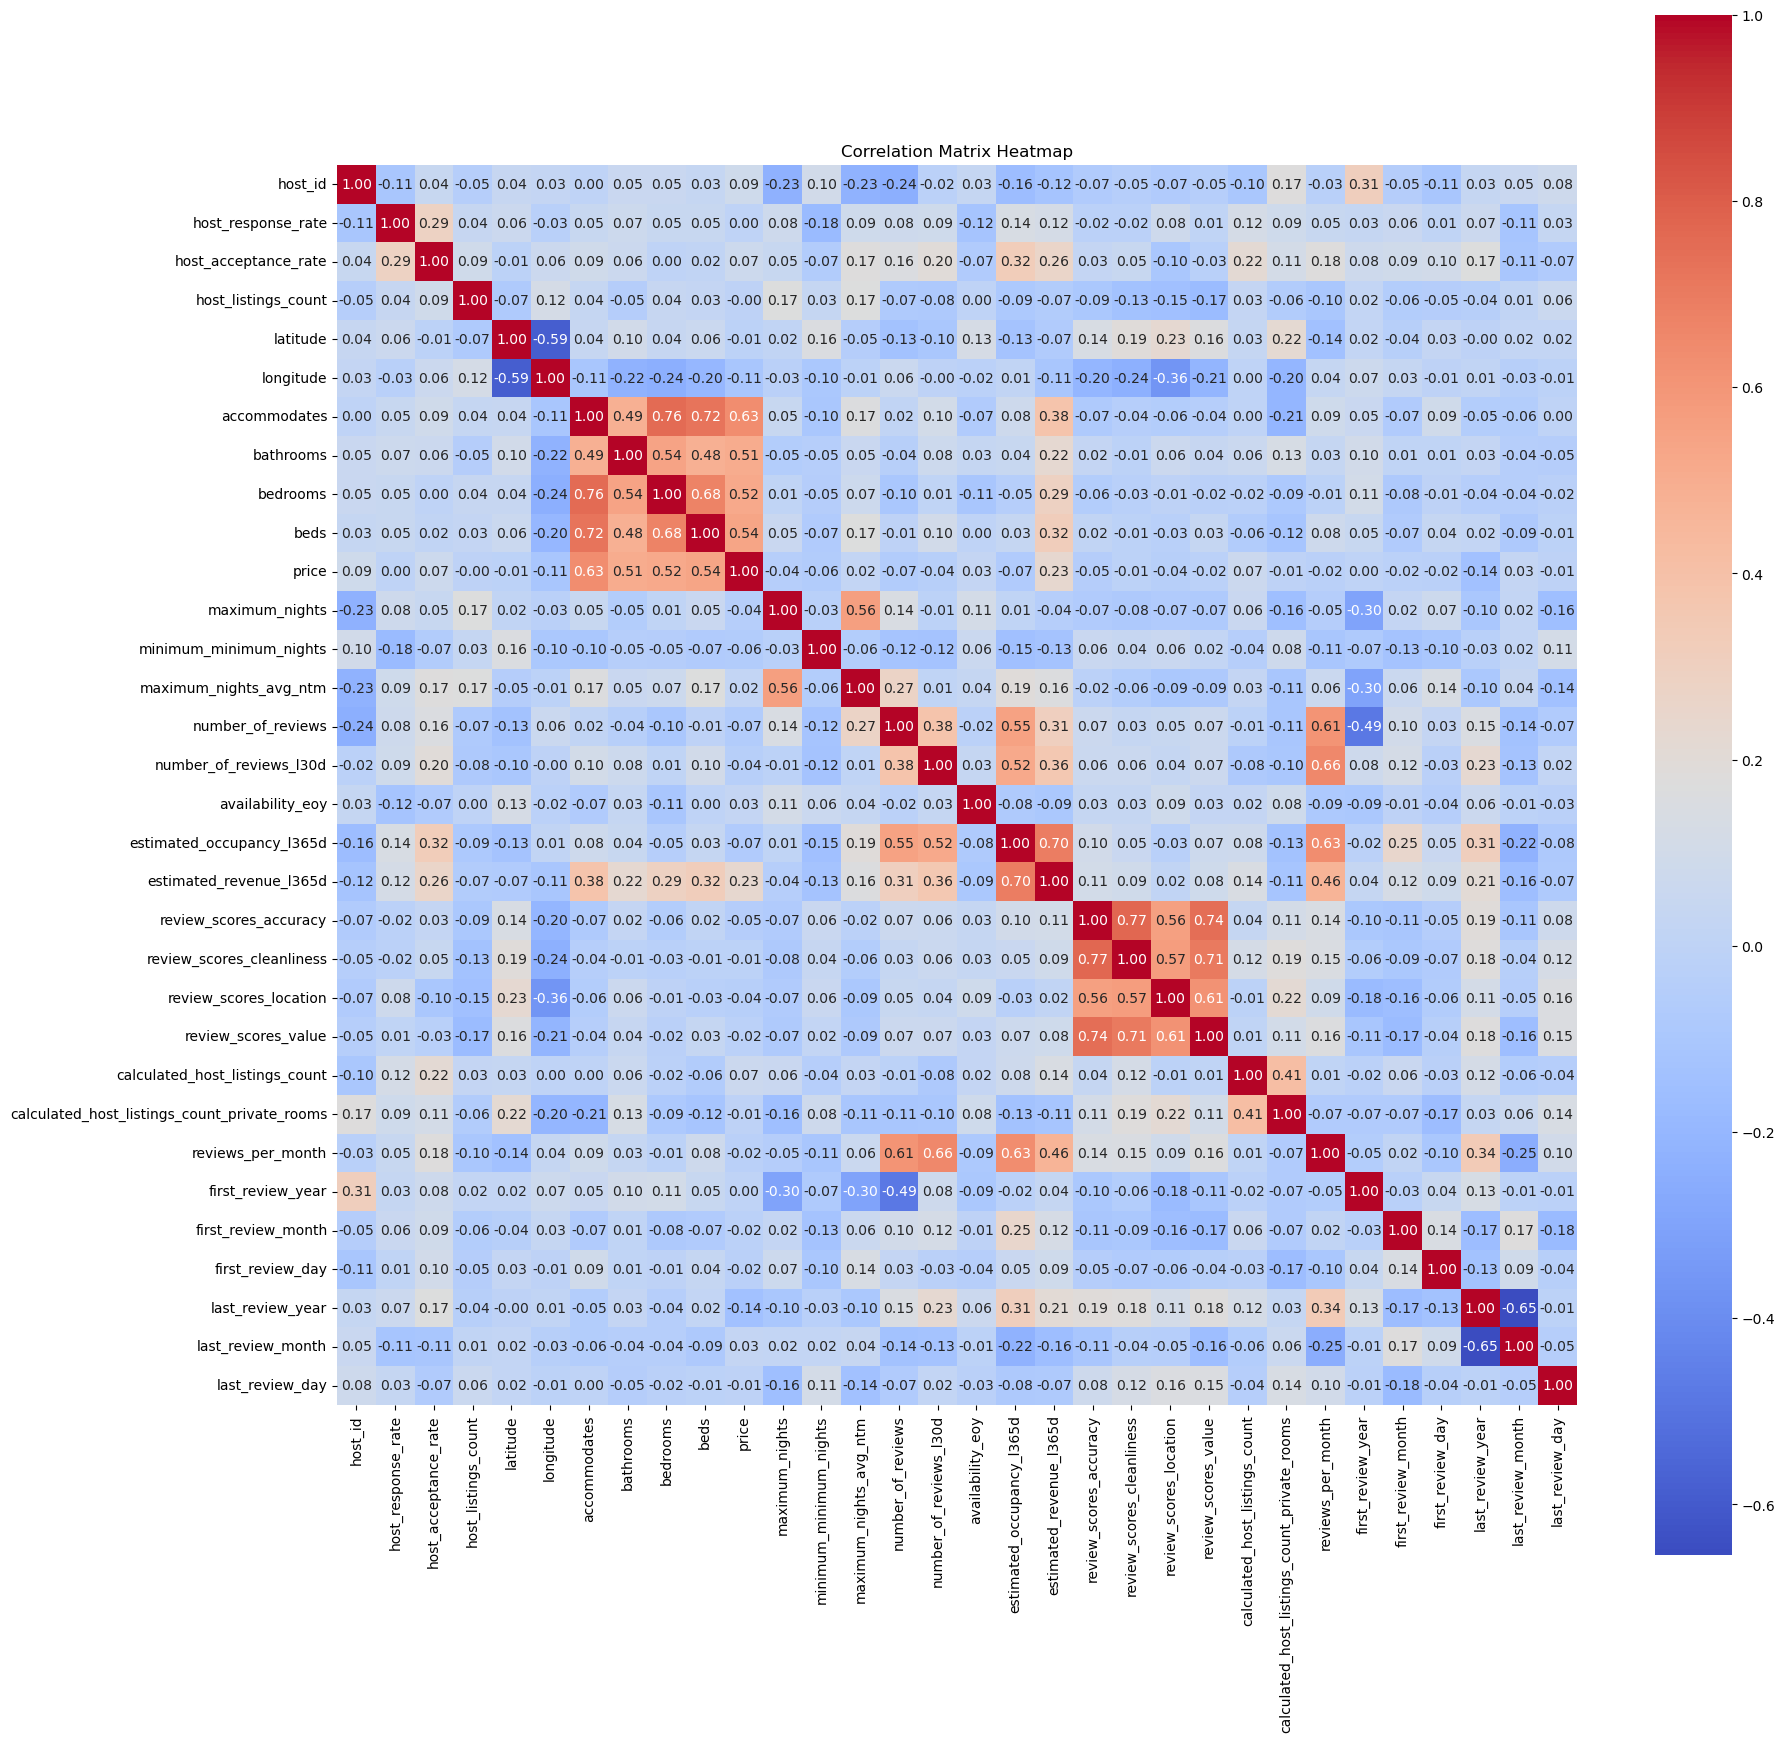

In [61]:
numaric = df.select_dtypes(include = 'number').columns
plt.figure(figsize=(20 , 20 ))
sns.heatmap(df[numaric].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

##   Feature Selection for Modeling

In [62]:
selected_features = ['beds' , 'bathrooms' , 'accommodates' , 'bedrooms' , 'estimated_revenue_l365d' , 'last_review_year' , 'longitude']
X = df[selected_features]
y = df['price']

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test)